In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/'

Sed_tl = pd.read_csv(path + 'transport_limited/langtang/cellnr21/Sediment.out')

Sed_mean      = pd.read_csv(path + 'supply_limited/langtang_annual_mean/cellnr19/Sediment.out')
Sed_percent25 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean25percent/cellnr21/Sediment.out')
Sed_percent50 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean50percent/cellnr21/Sediment.out')
Sed_percent75 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean75percent/cellnr21/Sediment.out')


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
623107    0.0
623108    0.0
623109    0.0
623110    0.0
623111    0.0
Name: Q100, Length: 623112, dtype: float64

In [4]:
hourly_data = Sed_mean
# Convert the 'datetime' column to datetime format if it's not already in that format
hourly_data['D'] = pd.to_datetime(hourly_data['D'])

# Set 'datetime' column as the index
hourly_data.set_index('D', inplace=True)

# Resample to monthly sums within each year
monthly_sums = hourly_data.resample('M').sum()

# Calculate the mean monthly sum across all the years for each month
mean_monthly_sum = monthly_sums.groupby(monthly_sums.index.month).mean()
mean_monthly_sum

,Q0,Q10,Q25,Q50,Q75,Q90,Q100,sc,ls,Qstl,Qdftl
D,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.417603,3.100000e-08,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.963992,2.825352e-08,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.417642,3.100000e-08,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.339673,3.000000e-08,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.417682,3.100000e-08,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.339712,3.000000e-08,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.417722,3.100000e-08,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.417742,3.100000e-08,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.318281,3.000000e-08,0.0,0.0


<BarContainer object of 12 artists>

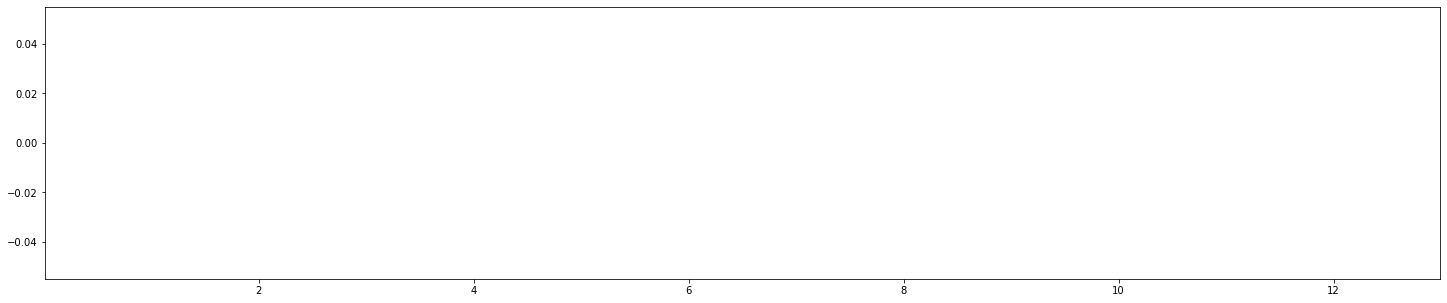

In [5]:
plt.figure(figsize=(25,5))

# transport limited
plt.bar(height = mean_monthly_sum.Qstl, x = mean_monthly_sum.index, color = 'magenta', label = 'Qs transport limited')
plt.bar(height = mean_monthly_sum.Qstl, x = mean_monthly_sum.index, color = 'magenta', label = 'Qs transport limited')
